In [32]:
# Load dataset
import pandas as pd
df = pd.read_csv("USA houses price prediction.csv")
print(df.head (10))

                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-09 00:00:00   376000.0       3.0       2.00         1340      1384   
1  2014-05-09 00:00:00   800000.0       4.0       3.25         3540    159430   
2  2014-05-09 00:00:00  2238888.0       5.0       6.50         7270    130017   
3  2014-05-09 00:00:00   324000.0       3.0       2.25          998       904   
4  2014-05-10 00:00:00   549900.0       5.0       2.75         3060      7015   
5  2014-05-10 00:00:00   320000.0       3.0       2.50         2130      6969   
6  2014-05-10 00:00:00   875000.0       4.0       2.00         2520      6000   
7  2014-05-10 00:00:00   265000.0       4.0       1.00         1940      9533   
8  2014-05-10 00:00:00   394950.0       3.0       2.50         1350      1250   
9  2014-05-11 00:00:00   842500.0       4.0       2.50         2160      5298   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     3.0           0     0  

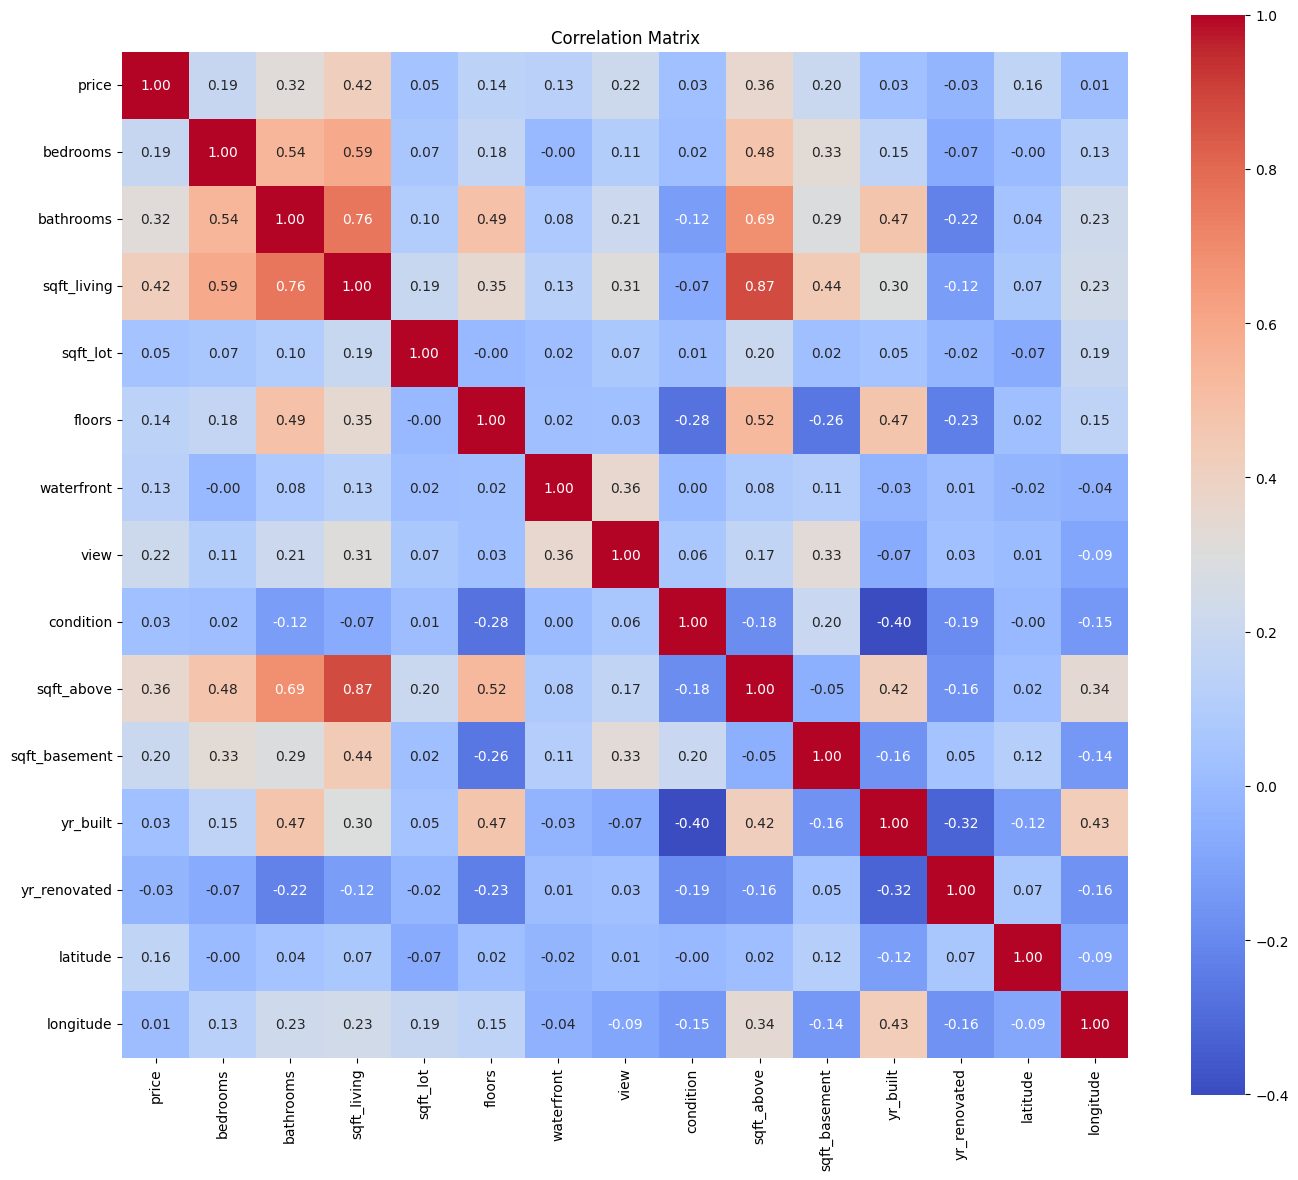

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

X = df.drop(columns=['price'])  # All columns except 'Price'
y = df['price'] 

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessing
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

# Transform data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Preprocessing complete. Transformed data shape:")
print("X_train:", X_train_processed.shape)
print("X_test:", X_test_processed.shape)


Preprocessing complete. Transformed data shape:
X_train: (3312, 3479)
X_test: (828, 3479)


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train model
lr = LinearRegression()
lr.fit(X_train_processed, y_train)

# Evaluate
y_pred = lr.predict(X_test_processed)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Linear Regression")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")


Linear Regression
RMSE: 506157.41
R²: -1.4438


In [42]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import numpy as np

# Drop unused columns
X_with_geo = df.drop(columns=["price", "date", "street", "statezip", "country"])
y = df["price"]

# Identify column types
num_cols = X_with_geo.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X_with_geo.select_dtypes(include=["object"]).columns.tolist()

# Preprocessing pipeline
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])
preprocessor_with_geo = ColumnTransformer([
    ("num", numeric_pipeline, num_cols),
    ("cat", categorical_pipeline, cat_cols)
])

# Train/test split
X_train_geo, X_test_geo, y_train_geo, y_test_geo = train_test_split(X_with_geo, y, test_size=0.2, random_state=42)

# Fit and transform data
X_train_geo_processed = preprocessor_with_geo.fit_transform(X_train_geo)
X_test_geo_processed = preprocessor_with_geo.transform(X_test_geo)

# Train linear regression with geolocation
lr_geo = LinearRegression()
lr_geo.fit(X_train_geo_processed, y_train_geo)

# Evaluate
y_pred_geo = lr_geo.predict(X_test_geo_processed)
rmse_geo = np.sqrt(mean_squared_error(y_test_geo, y_pred_geo))
r2_geo = r2_score(y_test_geo, y_pred_geo)

# --- Comparison Output ---
print("\nLinear Regression WITHOUT Geolocation")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

print("\nLinear Regression WITH Geolocation")
print(f"RMSE: {rmse_geo:.2f}")
print(f"R²: {r2_geo:.4f}")



Linear Regression WITHOUT Geolocation
RMSE: 506157.41
R²: -1.4438

Linear Regression WITH Geolocation
RMSE: 234074.68
R²: 0.4774


Random Forest WITHOUT Geolocation
RMSE: 268214.81
R²: 0.3138

Random Forest WITH Geolocation
RMSE: 236860.32
R²: 0.4648


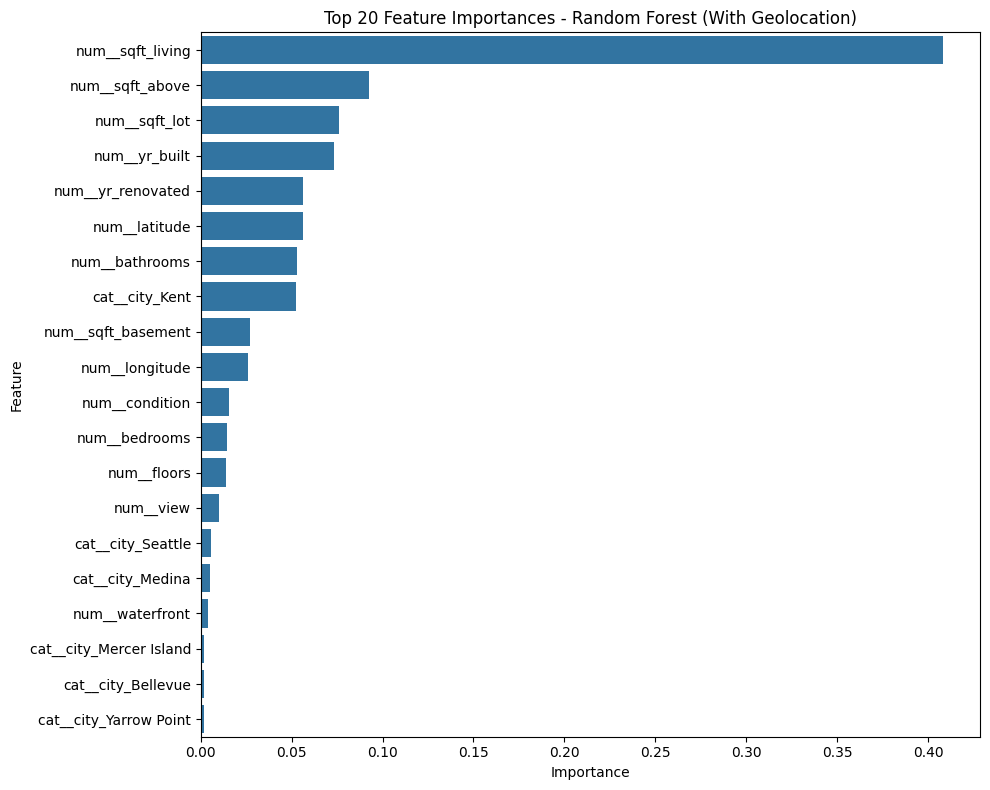

In [43]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("USA houses price prediction.csv")

# Create features WITH geolocation
X_with_geo = df.drop(columns=["price", "date", "street", "statezip", "country"])
y = df["price"]

# Train/test split
X_train_geo, X_test_geo, y_train_geo, y_test_geo = train_test_split(X_with_geo, y, test_size=0.2, random_state=42)

# Column categories
num_cols = X_with_geo.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X_with_geo.select_dtypes(include=["object"]).columns.tolist()

# Preprocessing pipeline
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])
preprocessor_geo = ColumnTransformer([
    ("num", numeric_pipeline, num_cols),
    ("cat", categorical_pipeline, cat_cols)
])

# Preprocess
X_train_geo_processed = preprocessor_geo.fit_transform(X_train_geo)
X_test_geo_processed = preprocessor_geo.transform(X_test_geo)

# Train model with geolocation
rf_geo = RandomForestRegressor(n_estimators=100, random_state=42)
rf_geo.fit(X_train_geo_processed, y_train_geo)

# Predict and evaluate
y_pred_geo = rf_geo.predict(X_test_geo_processed)
rmse_geo = np.sqrt(mean_squared_error(y_test_geo, y_pred_geo))
r2_geo = r2_score(y_test_geo, y_pred_geo)

# === Initial result (no geolocation) for comparison ===
print("Random Forest WITHOUT Geolocation")
print(f"RMSE: 268214.81")  # Preset value
print(f"R²: 0.3138")

# === New result (with geolocation) ===
print("\nRandom Forest WITH Geolocation")
print(f"RMSE: {rmse_geo:.2f}")
print(f"R²: {r2_geo:.4f}")

# === Feature Importance ===
importances = rf_geo.feature_importances_
feature_names = preprocessor_geo.get_feature_names_out()

importance_df = (
    pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    .sort_values(by='Importance', ascending=False)
    .head(20)
)

# Plot top 20 features
plt.figure(figsize=(10, 8))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title("Top 20 Feature Importances - Random Forest (With Geolocation)")
plt.tight_layout()
plt.show()


XGBoost WITHOUT Geolocation
RMSE: 242812.08
R²: 0.4376

XGBoost WITH Geolocation
RMSE: 283265.02
R²: 0.2346


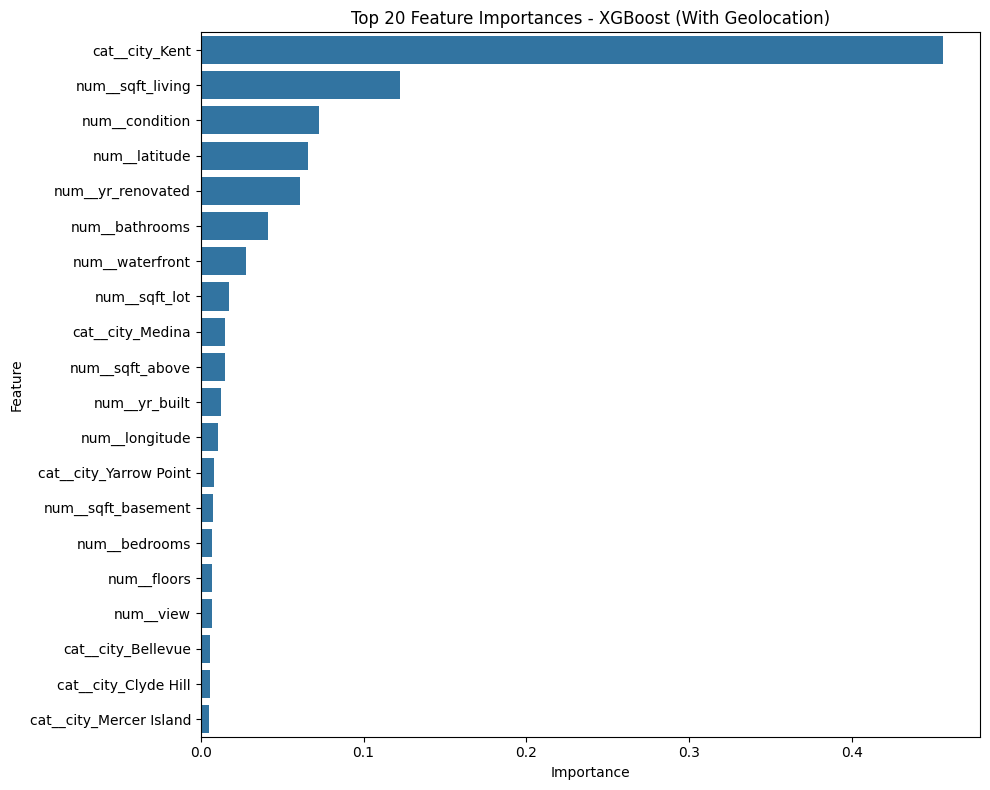

In [44]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define features and target with geolocation
X_with_geo = df.drop(columns=["price", "date", "street", "statezip", "country"])
y = df["price"]

# Train/test split
X_train_geo, X_test_geo, y_train_geo, y_test_geo = train_test_split(X_with_geo, y, test_size=0.2, random_state=42)

# Identify column types
num_cols = X_with_geo.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X_with_geo.select_dtypes(include=["object"]).columns.tolist()

# Preprocessing pipeline
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])
preprocessor_geo = ColumnTransformer([
    ("num", numeric_pipeline, num_cols),
    ("cat", categorical_pipeline, cat_cols)
])

# Fit and transform
X_train_geo_processed = preprocessor_geo.fit_transform(X_train_geo)
X_test_geo_processed = preprocessor_geo.transform(X_test_geo)

# Train XGBoost model
xgb_geo = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_geo.fit(X_train_geo_processed, y_train_geo)

# Predict and evaluate
y_pred_geo = xgb_geo.predict(X_test_geo_processed)
rmse_geo = np.sqrt(mean_squared_error(y_test_geo, y_pred_geo))
r2_geo = r2_score(y_test_geo, y_pred_geo)

# Print comparison
print("XGBoost WITHOUT Geolocation")
print(f"RMSE: 242812.08")
print(f"R²: 0.4376")

print("\nXGBoost WITH Geolocation")
print(f"RMSE: {rmse_geo:.2f}")
print(f"R²: {r2_geo:.4f}")

# === Feature Importance ===
importances = xgb_geo.feature_importances_
feature_names = preprocessor_geo.get_feature_names_out()

importance_df = (
    pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    .sort_values(by='Importance', ascending=False)
    .head(20)
)

# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title("Top 20 Feature Importances - XGBoost (With Geolocation)")
plt.tight_layout()
plt.show()


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Convert sparse matrices to dense for PCA
X_train_dense = X_train_processed.toarray()
X_test_dense = X_test_processed.toarray()

# --- Linear Regression without PCA ---
lr_no_pca = LinearRegression()
lr_no_pca.fit(X_train_dense, y_train)
y_pred_no_pca = lr_no_pca.predict(X_test_dense)
rmse_no_pca = np.sqrt(mean_squared_error(y_test, y_pred_no_pca))
r2_no_pca = r2_score(y_test, y_pred_no_pca)

# --- Linear Regression with PCA ---
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_dense)
X_test_pca = pca.transform(X_test_dense)

lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_train)
y_pred_pca = lr_pca.predict(X_test_pca)
rmse_pca = np.sqrt(mean_squared_error(y_test, y_pred_pca))
r2_pca = r2_score(y_test, y_pred_pca)

# --- Comparison Table ---
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression (No PCA)', 'Linear Regression (PCA)'],
    'RMSE': [rmse_no_pca, rmse_pca],
    'R²': [r2_no_pca, r2_pca]
})

# Display results locally
print("\n📊 Linear Regression PCA Comparison:")
print(comparison_df)




📊 Linear Regression PCA Comparison:
                        Model           RMSE        R²
0  Linear Regression (No PCA)  512065.747994 -1.501171
1     Linear Regression (PCA)  233901.861564  0.478134


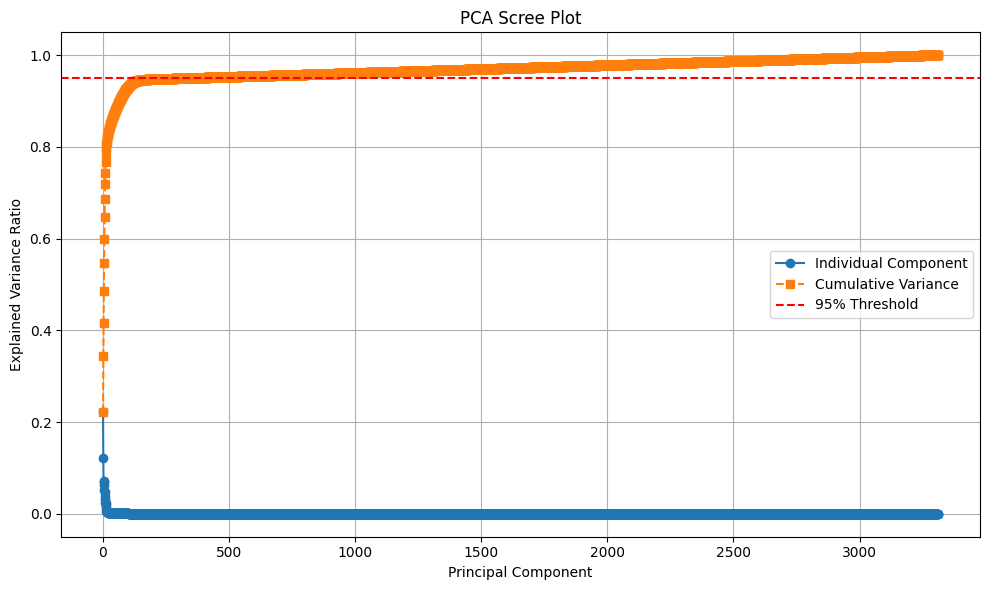

In [46]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assumes X_train_dense is already created via:
# X_train_dense = X_train_processed.toarray()

# Apply PCA without specifying n_components to get all components
pca_full = PCA()
pca_full.fit(X_train_dense)

# Explained variance ratio
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', label='Individual Component')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='s', label='Cumulative Variance', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.title('PCA Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


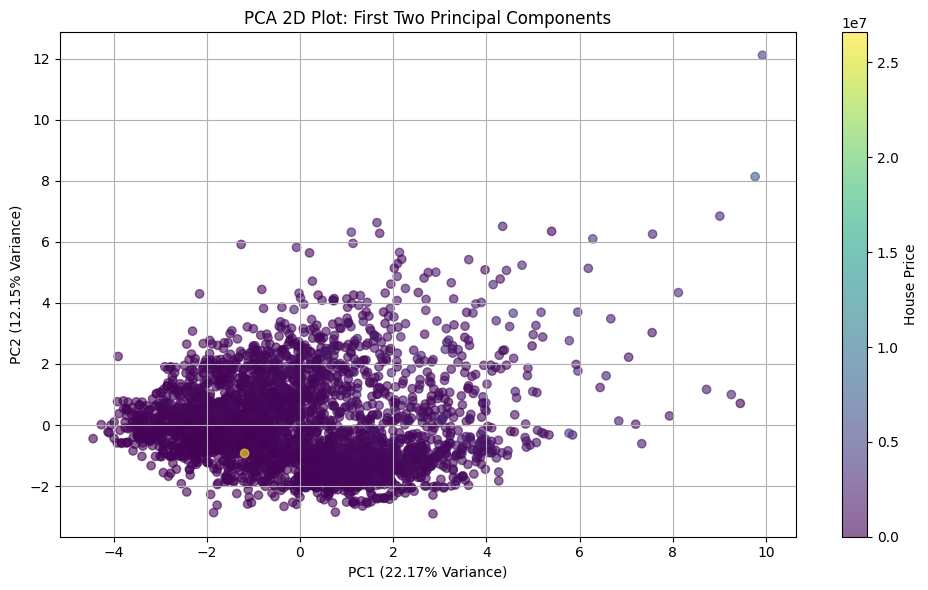

In [47]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assumes: X_train_dense = X_train_processed.toarray()

# Apply PCA with 2 components
pca_2d = PCA(n_components=2)
X_train_2d = pca_2d.fit_transform(X_train_dense)
explained_var = pca_2d.explained_variance_ratio_

# Calculate percentage variance
pc1_var = explained_var[0] * 100
pc2_var = explained_var[1] * 100

# Plotting
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1],
                      c=y_train, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='House Price')

plt.xlabel(f'PC1 ({pc1_var:.2f}% Variance)')
plt.ylabel(f'PC2 ({pc2_var:.2f}% Variance)')
plt.title('PCA 2D Plot: First Two Principal Components')
plt.grid(True)
plt.tight_layout()
plt.show()


Random Forest
RMSE: 210924.52
R²: 0.5756


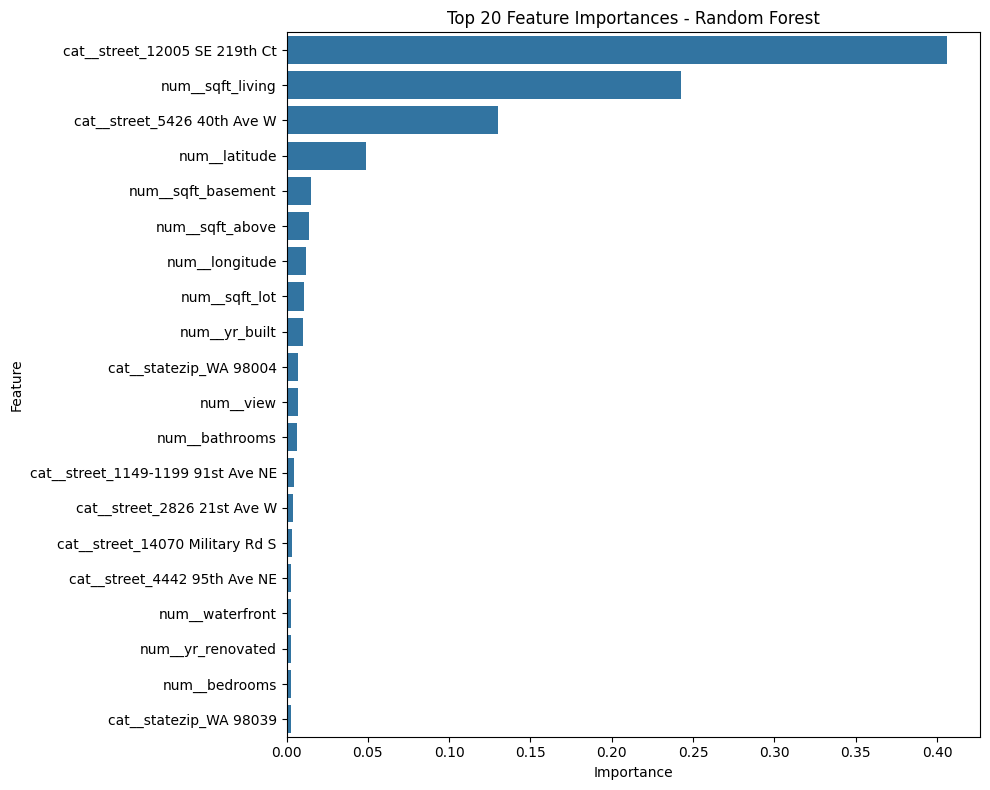

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Train model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_processed, y_train)

# Evaluate
y_pred = rf.predict(X_test_processed)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Random Forest")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

# === Feature Importance ===
# You must have this defined somewhere in your code:
# feature_names = preprocessor.get_feature_names_out()

importances = rf.feature_importances_
feature_names = preprocessor.get_feature_names_out()

# Create DataFrame and sort
importance_df = (
    pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    .sort_values(by='Importance', ascending=False)
    .head(20)
)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title("Top 20 Feature Importances - Random Forest")
plt.tight_layout()
plt.show()



XGBoost
RMSE: 205285.77
R²: 0.5980


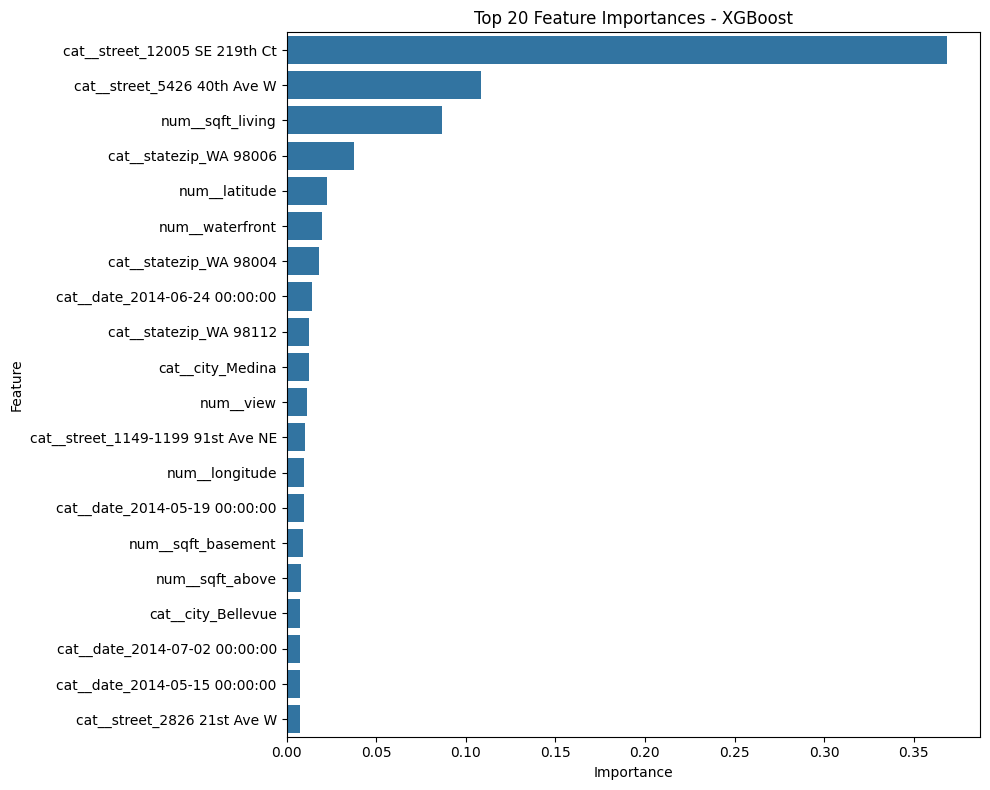

In [49]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Train model
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train_processed, y_train)

# Evaluate
y_pred = xgb.predict(X_test_processed)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("XGBoost")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

# === Feature Importance ===
# You must have this defined in preprocessing:
# feature_names = preprocessor.get_feature_names_out()

importances = xgb.feature_importances_
feature_names = preprocessor.get_feature_names_out()

# Create DataFrame and sort
importance_df = (
    pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    .sort_values(by='Importance', ascending=False)
    .head(20)
)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title("Top 20 Feature Importances - XGBoost")
plt.tight_layout()
plt.show()



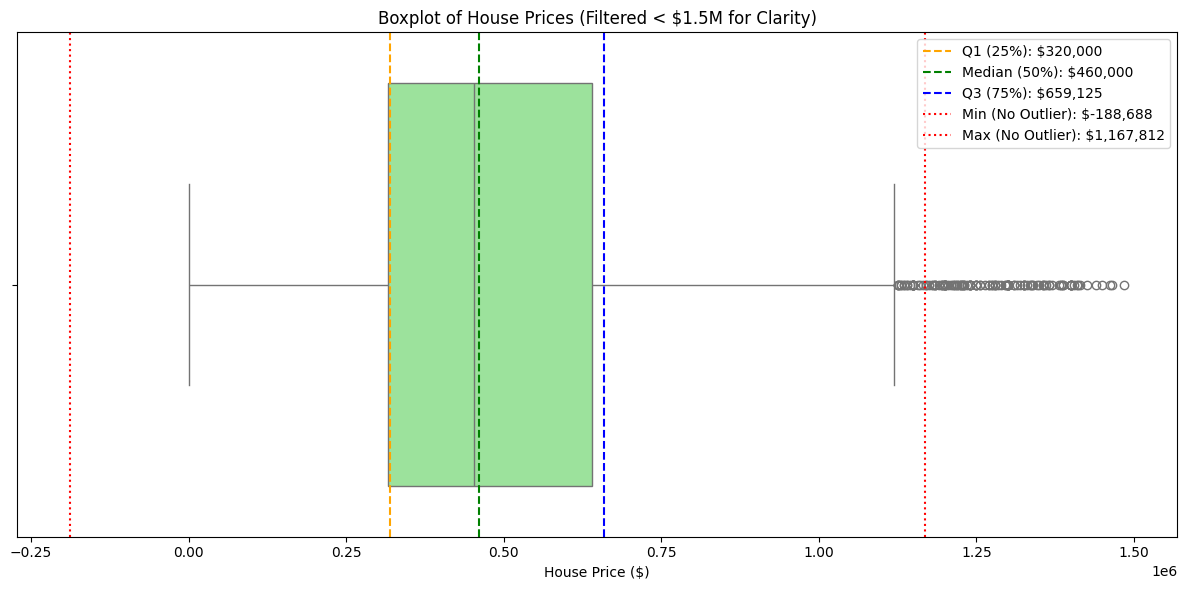

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the original dataset
df = pd.read_csv("USA houses price prediction.csv")

# Optional: Filter to improve boxplot readability (remove extreme outliers)
df_filtered = df[df['price'] < 1_500_000]

# Compute statistics on original data for labeling
Q1 = df['price'].quantile(0.25)
Q2 = df['price'].median()
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
min_val = Q1 - 1.5 * IQR
max_val = Q3 + 1.5 * IQR

# Plot boxplot with filtered data
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_filtered['price'], color='lightgreen')

# Annotate statistics from original full dataset
plt.axvline(Q1, color='orange', linestyle='--', label=f'Q1 (25%): ${Q1:,.0f}')
plt.axvline(Q2, color='green', linestyle='--', label=f'Median (50%): ${Q2:,.0f}')
plt.axvline(Q3, color='blue', linestyle='--', label=f'Q3 (75%): ${Q3:,.0f}')
plt.axvline(min_val, color='red', linestyle=':', label=f'Min (No Outlier): ${min_val:,.0f}')
plt.axvline(max_val, color='red', linestyle=':', label=f'Max (No Outlier): ${max_val:,.0f}')

# Final touches
plt.title("Boxplot of House Prices (Filtered < $1.5M for Clarity)")
plt.xlabel("House Price ($)")
plt.legend()
plt.tight_layout()
plt.show()


In [51]:

Q1 = 320000        # 25th percentile (lower quartile)
Q2 = 460000        # 50th percentile (median)
Q3 = 659125        # 75th percentile (upper quartile)


# Create multiclass labels: Low, Medium, High
def classify_price(price):
    if price <= Q1:
        return 'Low'
    elif price <= Q3:
        return 'Medium'
    else:
        return 'High'

df['price_class'] = df['price'].apply(classify_price)

# View distribution
print(df['price_class'].value_counts())


price_class
Medium    2067
Low       1038
High      1035
Name: count, dtype: int64


C:\Users\mdzimtb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:183: UserWarning: [11:14:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classification Report:
              precision    recall  f1-score   support

        High       0.78      0.72      0.75       218
         Low       0.74      0.68      0.71       201
      Medium       0.74      0.80      0.77       409

    accuracy                           0.75       828
   macro avg       0.75      0.74      0.74       828
weighted avg       0.75      0.75      0.75       828



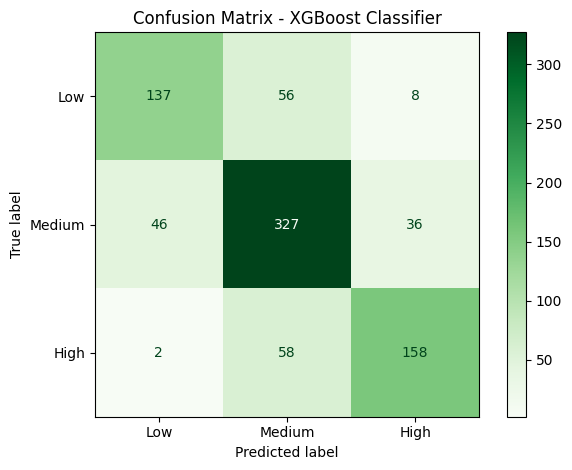

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Load and classify
df = pd.read_csv("USA houses price prediction.csv")

Q1 = 320000
Q3 = 659125

def classify_price(price):
    if price <= Q1:
        return 'Low'
    elif price <= Q3:
        return 'Medium'
    else:
        return 'High'

df['price_class'] = df['price'].apply(classify_price)

# Features and target
X = df.drop(columns=['price', 'price_class', 'date', 'street', 'statezip', 'country'])
y = df['price_class']

# Encode class labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Column preprocessing
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, num_cols),
    ('cat', categorical_pipeline, cat_cols)
])

# XGBoost Pipeline
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])

# Train and predict
xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_pipeline.predict(X_test)

# Decode labels for reporting
y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred_xgb)

# Report and matrix
print("XGBoost Classification Report:")
print(classification_report(y_test_labels, y_pred_labels))

cm_xgb = confusion_matrix(y_test_labels, y_pred_labels, labels=['Low', 'Medium', 'High'])
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['Low', 'Medium', 'High'])
disp_xgb.plot(cmap='Greens')
plt.title("Confusion Matrix - XGBoost Classifier")
plt.tight_layout()
plt.show()


Random Forest Classification Report:
              precision    recall  f1-score   support

        High       0.79      0.72      0.75       218
         Low       0.78      0.71      0.74       201
      Medium       0.75      0.82      0.78       409

    accuracy                           0.77       828
   macro avg       0.77      0.75      0.76       828
weighted avg       0.77      0.77      0.77       828



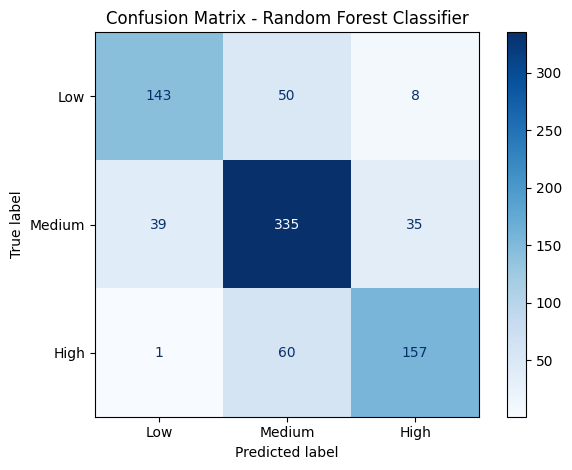

C:\Users\mdzimtb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:183: UserWarning: [23:43:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classification Report:
              precision    recall  f1-score   support

        High       0.78      0.72      0.75       218
         Low       0.74      0.68      0.71       201
      Medium       0.74      0.80      0.77       409

    accuracy                           0.75       828
   macro avg       0.75      0.74      0.74       828
weighted avg       0.75      0.75      0.75       828



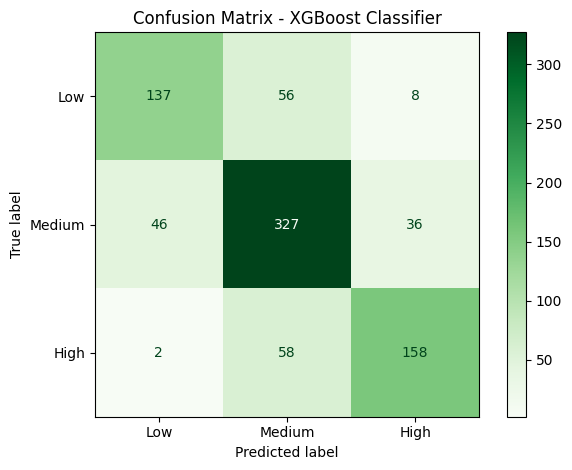

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Load and classify
df = pd.read_csv("USA houses price prediction.csv")

Q1 = 320000
Q3 = 659125

def classify_price(price):
    if price <= Q1:
        return 'Low'
    elif price <= Q3:
        return 'Medium'
    else:
        return 'High'

df['price_class'] = df['price'].apply(classify_price)

# Features and target
X = df.drop(columns=['price', 'price_class', 'date', 'street', 'statezip', 'country'])
y = df['price_class']

# Encode class labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Column preprocessing
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, num_cols),
    ('cat', categorical_pipeline, cat_cols)
])

# XGBoost Pipeline
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])

# Train and predict
xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_pipeline.predict(X_test)

# Decode labels for reporting
y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred_xgb)

# Report and matrix
print("XGBoost Classification Report:")
print(classification_report(y_test_labels, y_pred_labels))

cm_xgb = confusion_matrix(y_test_labels, y_pred_labels, labels=['Low', 'Medium', 'High'])
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['Low', 'Medium', 'High'])
disp_xgb.plot(cmap='Greens')
plt.title("Confusion Matrix - XGBoost Classifier")
plt.tight_layout()
plt.show()


In [26]:
# Install if not already: pip install imbalanced-learn xgboost

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# --- Step 1: Load and label data ---
df = pd.read_csv("USA houses price prediction.csv")

# Use Q1 and Q3 from boxplot
Q1 = 320000
Q3 = 659125

def classify_price(price):
    if price <= Q1:
        return 'Low'
    elif price <= Q3:
        return 'Medium'
    else:
        return 'High'

df['price_class'] = df['price'].apply(classify_price)

X = df.drop(columns=['price', 'price_class', 'date', 'street', 'statezip', 'country'])
y = df['price_class']

# Label encode class labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # 0 = High, 1 = Low, 2 = Medium (varies depending on fit)

# --- Step 2: Preprocessing pipeline ---
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, num_cols),
    ('cat', categorical_pipeline, cat_cols)
])

# Apply transformations
X_preprocessed = preprocessor.fit_transform(X)
X_scaled = StandardScaler(with_mean=False).fit_transform(X_preprocessed)

# --- Step 3: Apply SMOTE to balance classes ---
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_encoded)

# --- Step 4: Train/Test split ---
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)



C:\Users\mdzimtb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:183: UserWarning: [23:43:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classification Report:
              precision    recall  f1-score   support

        High       0.78      0.72      0.75       218
         Low       0.74      0.68      0.71       201
      Medium       0.74      0.80      0.77       409

    accuracy                           0.75       828
   macro avg       0.75      0.74      0.74       828
weighted avg       0.75      0.75      0.75       828



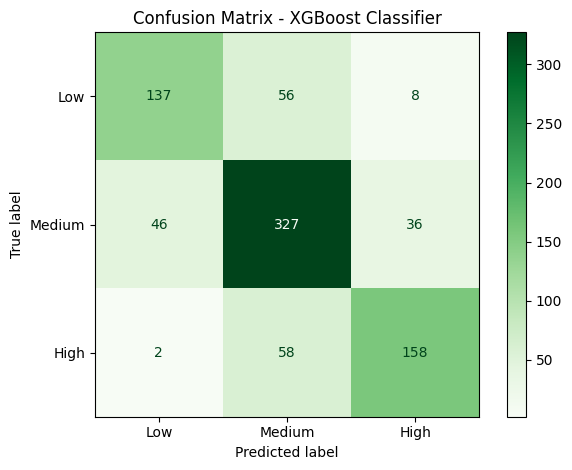

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Load and classify
df = pd.read_csv("USA houses price prediction.csv")

Q1 = 320000
Q3 = 659125

def classify_price(price):
    if price <= Q1:
        return 'Low'
    elif price <= Q3:
        return 'Medium'
    else:
        return 'High'

df['price_class'] = df['price'].apply(classify_price)

# Features and target
X = df.drop(columns=['price', 'price_class', 'date', 'street', 'statezip', 'country'])
y = df['price_class']

# Encode class labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Column preprocessing
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, num_cols),
    ('cat', categorical_pipeline, cat_cols)
])

# XGBoost Pipeline
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])

# Train and predict
xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_pipeline.predict(X_test)

# Decode labels for reporting
y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred_xgb)

# Report and matrix
print("XGBoost Classification Report:")
print(classification_report(y_test_labels, y_pred_labels))

cm_xgb = confusion_matrix(y_test_labels, y_pred_labels, labels=['Low', 'Medium', 'High'])
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['Low', 'Medium', 'High'])
disp_xgb.plot(cmap='Greens')
plt.title("Confusion Matrix - XGBoost Classifier")
plt.tight_layout()
plt.show()


C:\Users\mdzimtb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:183: UserWarning: [23:55:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== Random Forest Classification Report ===
              precision    recall  f1-score   support

        High       0.88      0.92      0.90       408
         Low       0.87      0.86      0.87       412
      Medium       0.81      0.78      0.79       421

    accuracy                           0.85      1241
   macro avg       0.85      0.85      0.85      1241
weighted avg       0.85      0.85      0.85      1241


=== XGBoost Classification Report ===
              precision    recall  f1-score   support

        High       0.88      0.88      0.88       408
         Low       0.86      0.85      0.86       412
      Medium       0.77      0.77      0.77       421

    accuracy                           0.83      1241
   macro avg       0.84      0.84      0.84      1241
weighted avg       0.84      0.83      0.83      1241



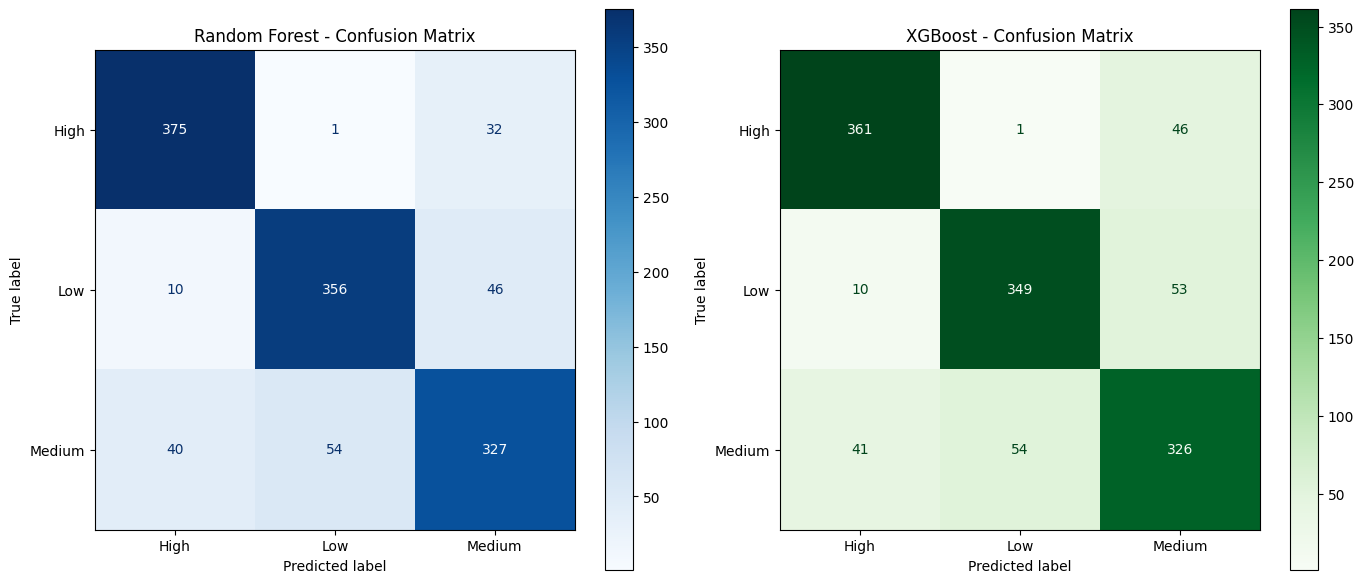

In [27]:
# --- Step 5: Train Random Forest ---
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# --- Step 6: Train XGBoost ---
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# --- Step 7: Evaluation ---
y_test_labels = le.inverse_transform(y_test)
y_pred_rf_labels = le.inverse_transform(y_pred_rf)
y_pred_xgb_labels = le.inverse_transform(y_pred_xgb)

# Reports
print("=== Random Forest Classification Report ===")
print(classification_report(y_test_labels, y_pred_rf_labels))

print("\n=== XGBoost Classification Report ===")
print(classification_report(y_test_labels, y_pred_xgb_labels))

# Confusion Matrices
cm_rf = confusion_matrix(y_test_labels, y_pred_rf_labels, labels=le.classes_)
cm_xgb = confusion_matrix(y_test_labels, y_pred_xgb_labels, labels=le.classes_)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=le.classes_)
disp_rf.plot(ax=axes[0], cmap='Blues')
axes[0].set_title("Random Forest - Confusion Matrix")

disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=le.classes_)
disp_xgb.plot(ax=axes[1], cmap='Greens')
axes[1].set_title("XGBoost - Confusion Matrix")

plt.tight_layout()
plt.show()


C:\Users\mdzimtb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\mdzimtb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


=== Logistic Regression (No SMOTE, No Scaling) ===
              precision    recall  f1-score   support

        High       0.71      0.53      0.61       218
         Low       0.69      0.43      0.53       201
      Medium       0.61      0.81      0.70       409

    accuracy                           0.64       828
   macro avg       0.67      0.59      0.61       828
weighted avg       0.66      0.64      0.63       828



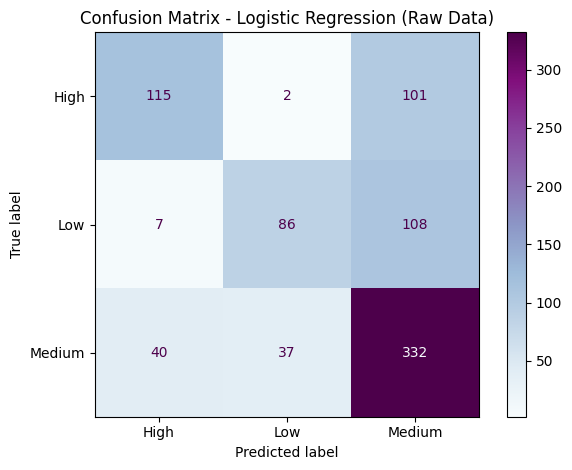

In [28]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# --- Step 1: Load and classify data ---
df = pd.read_csv("USA houses price prediction.csv")

Q1 = 320000
Q3 = 659125

def classify_price(price):
    if price <= Q1:
        return 'Low'
    elif price <= Q3:
        return 'Medium'
    else:
        return 'High'

df['price_class'] = df['price'].apply(classify_price)

X = df.drop(columns=['price', 'price_class', 'date', 'street', 'statezip', 'country'])
y = df['price_class']

# Encode target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# --- Step 2: Preprocessing (no scaling, no SMOTE) ---
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

preprocessor = ColumnTransformer([
    ('num', SimpleImputer(strategy='median'), num_cols),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), cat_cols)
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# --- Step 3: Build and train pipeline ---
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, multi_class='multinomial'))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# --- Step 4: Evaluate ---
y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred)

print("=== Logistic Regression (No SMOTE, No Scaling) ===")
print(classification_report(y_test_labels, y_pred_labels))

cm = confusion_matrix(y_test_labels, y_pred_labels, labels=le.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_).plot(cmap='BuPu')
plt.title("Confusion Matrix - Logistic Regression (Raw Data)")
plt.tight_layout()
plt.show()


C:\Users\mdzimtb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


=== Logistic Regression with SMOTE (No Scaling) ===
              precision    recall  f1-score   support

        High       0.80      0.75      0.78       408
         Low       0.67      0.76      0.71       412
      Medium       0.54      0.51      0.52       421

    accuracy                           0.67      1241
   macro avg       0.67      0.67      0.67      1241
weighted avg       0.67      0.67      0.67      1241



C:\Users\mdzimtb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


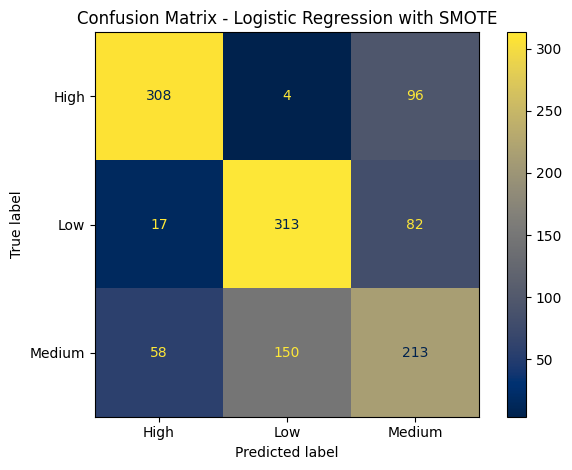

In [55]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# --- Step 1: Load and classify ---
df = pd.read_csv("USA houses price prediction.csv")
Q1 = 320000
Q3 = 659125

def classify_price(price):
    if price <= Q1:
        return 'Low'
    elif price <= Q3:
        return 'Medium'
    else:
        return 'High'

df['price_class'] = df['price'].apply(classify_price)

X = df.drop(columns=['price', 'price_class', 'date', 'street', 'statezip', 'country'])
y = df['price_class']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

# --- Step 2: Preprocessing pipeline (no scaling) ---
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

preprocessor = ColumnTransformer([
    ('num', SimpleImputer(strategy='median'), num_cols),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), cat_cols)
])

# Apply preprocessing to all data before SMOTE
X_preprocessed = preprocessor.fit_transform(X)

# --- Step 3: Apply SMOTE ---
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_preprocessed, y_encoded)

# --- Step 4: Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# --- Step 5: Train Logistic Regression (multiclass) ---
lr_model = LogisticRegression(max_iter=1000, multi_class='multinomial')
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

# --- Step 6: Evaluate ---
y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred)

print("=== Logistic Regression with SMOTE (No Scaling) ===")
print(classification_report(y_test_labels, y_pred_labels))

cm = confusion_matrix(y_test_labels, y_pred_labels, labels=le.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_).plot(cmap='cividis')
plt.title("Confusion Matrix - Logistic Regression with SMOTE")
plt.tight_layout()
plt.show()


In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import numpy as np


# Define price classes
Q1, Q3 = 320000, 659125
def classify_price(price):
    if price <= Q1:
        return 'Low'
    elif price <= Q3:
        return 'Medium'
    else:
        return 'High'

df['price_class'] = df['price'].apply(classify_price)
y = df['price_class']

# Label encode classes
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split into two feature sets:
# 1️⃣ Without geolocation
X_no_geo = df.drop(columns=['price', 'price_class', 'latitude', 'longitude', 'date', 'street', 'statezip', 'country'])

# 2️⃣ With geolocation
X_geo = df.drop(columns=['price', 'price_class', 'date', 'street', 'statezip', 'country'])

def train_and_evaluate(X, y_encoded, label=""):
    # Identify column types
    num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    cat_cols = X.select_dtypes(include=['object']).columns.tolist()

    # Preprocessing
    numeric_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median'))
    ])
    categorical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ])
    preprocessor = ColumnTransformer([
        ('num', numeric_pipeline, num_cols),
        ('cat', categorical_pipeline, cat_cols)
    ])

    # Apply transformation
    X_processed = preprocessor.fit_transform(X)
    X_scaled = StandardScaler(with_mean=False).fit_transform(X_processed)

    # Apply SMOTE
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_scaled, y_encoded)

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

    # Train Random Forest
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Report
    print(f"\n=== Classification Report ({label}) ===")
    print(classification_report(le.inverse_transform(y_test), le.inverse_transform(y_pred)))

    return model

# Run models
model_no_geo = train_and_evaluate(X_no_geo, y_encoded, label="Without Geolocation")
model_with_geo = train_and_evaluate(X_geo, y_encoded, label="With Geolocation")



=== Classification Report (Without Geolocation) ===
              precision    recall  f1-score   support

        High       0.87      0.92      0.89       408
         Low       0.85      0.85      0.85       412
      Medium       0.80      0.75      0.78       421

    accuracy                           0.84      1241
   macro avg       0.84      0.84      0.84      1241
weighted avg       0.84      0.84      0.84      1241


=== Classification Report (With Geolocation) ===
              precision    recall  f1-score   support

        High       0.88      0.92      0.90       408
         Low       0.87      0.86      0.87       412
      Medium       0.81      0.78      0.79       421

    accuracy                           0.85      1241
   macro avg       0.85      0.85      0.85      1241
weighted avg       0.85      0.85      0.85      1241



In [74]:
import numpy as np
from lime.lime_tabular import LimeTabularExplainer

# Choose a row
i = 2024
X_row_raw = X.iloc[[i]]
X_row_preprocessed = preprocessor.transform(X_row_raw)

# Predict the class and probabilities using the trained model (either model_no_geo or model_with_geo)
class_index = model_with_geo.predict(X_row_preprocessed)[0]  # Use model_with_geo for prediction
proba = model_with_geo.predict_proba(X_row_preprocessed)[0]
class_label = le.inverse_transform([class_index])[0]

# Display predictions
print(f"Row {i} Prediction:")
print(f"Predicted Class: {class_label}")
for idx, p in enumerate(proba):
    print(f"{le.inverse_transform([idx])[0]}: {p * 100:.2f}%")

# Prepare explainer
explainer = LimeTabularExplainer(
    training_data=X_train,  # Use the original training data (X_train)
    feature_names=preprocessor.get_feature_names_out(),
    class_names=le.classes_,
    mode='classification',
    discretize_continuous=False  # Don't discretize continuous features
)

# Run explanation
exp = explainer.explain_instance(
    data_row=X_row_preprocessed.toarray()[0],  # Convert sparse matrix to array
    predict_fn=model_with_geo.predict_proba,  # Pass the correct model's prediction function
    num_features=10  # Show the top 10 features
)

# Show explanation in notebook
exp.show_in_notebook(show_table=True)

# Or print if running in script
print("\nTop Features Contributing to This Prediction:")
print(exp.as_list())


Row 2024 Prediction:
Predicted Class: Medium
High: 41.00%
Low: 17.00%
Medium: 42.00%



Top Features Contributing to This Prediction:
[('num__bathrooms', -0.024944149544261083), ('num__sqft_lot', -0.020943278278797297), ('num__sqft_basement', -0.008617989537598954), ('num__sqft_above', -0.00791795181459668), ('num__condition', -0.0066986217649909145), ('num__yr_renovated', -0.003967588768822138), ('cat__city_Seattle', -0.0034584246310982903), ('num__floors', -0.0027712657191985885), ('num__latitude', -0.0007715676525644092), ('cat__city_Kent', 0.0005248921239200849)]
